# 14. nodarbība

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.linalg as la
import csv

## 1. uzdevums. Kompleksi skaitļi

Reālu argumentu elementāro funkciju $f:\mathbb{R}\to\mathbb{R}$ paplašinājumi līdz kompleksiem skaitļiem ir pazīstami kā analītiskās funkcijas $F:\mathbb{C}\to\mathbb{C}$. Šajā uzdevumā apskatīsim sīnusa funkcijas paplašinājumu līdz kompleksajiem skaitļiem. Pieņemsim, ka $z=a+b \imath $.<i>Python</i> kompleksos skaitļus pieraksta sekojoši `1.2+2.4j` – ņemiet vērā, ka netiek izmantotas atstarpes vai reizināšanas zīme starp imagināro daļu un `j`.

1. Izsaki $\sin z$ kompleksu kāpinātāju veidā:
$\sin z=\frac{1}{2\mathrm{i}}\left[\exp(\mathrm{i}z)-\exp(-\mathrm{i}z)\right]$
2. Izsaki  $\sin z$ reālo un imagināro daļu trigonometrisku un hiperbolisku funkciju ar reāliem argumentiem $a$ vai $b$ veidā:
$\begin{aligned}
    \sin z &= \sin(a+b\mathrm{i})\\
    &= \sin a\cos b\mathrm{i}+\cos a\sin b\mathrm{i}\\
    &= \sin a\cosh b+\mathrm{i}\cos a\sinh b.
\end{aligned}$

Tagad nepieciešams izveidot $\sin z$ grafiku. Šī uzdevuma problēma ir tajā, ka funkcijas ievaddatiem jābūt kompleksam skaitlim, resp., reāla $\Re z$ un imagināra $\Im z$ skaitļa pārim, kā arī funkcijas izvadē iegūsim kompleksu skaitli, resp., reāla $\Re\sin z$ un imagināra $\Im\sin z$ skaitļa pāri. Ja vēlamies attēlot visu vienā grafikā, nepietiks dimensiju. Šo problēma parasti risina, veidojot *kontūras* (*contour*) grafikus $\Re\sin z$ un $\Im\sin z$. Horizontālās un vertikālās asis būs reālās daļas, savukārt kmpleksās plaknes imaginarās asis tiks kodētas, izmantojot krāsu.

3. Izveido divus masīvus `x` un `y` $z$ reālajai un imaginārajai daļai, abiem masīviem jāsatur 201 vērtību ar vienādiem soļiem diapazonā $[-\pi,\pi]$. Šī uzdevuma izpildei izmanto funkciju `np.linspace()`.
4. Mums ir nepieciešami visi iespējamie `x` un `y` vērtību pāri, tāpēc nepieciešams paplašināt katru vektoru. To iespējams paveikt ar komandu `xx, yy = np.meshgrid(x, y)`.
5. Tagad nepieciešams aprēķināt funkcijas $\sin z$ vērtības izveidotajā telpā (*mesh*).

In [6]:
x = y = np.linspace(-np.pi, np.pi, 201)
xx, yy = np.meshgrid(x, y)

zz = np.sin(xx + 1j * yy)

6. Visbeidzot varam izveidot kontūras grafikus no $\Re\sin z$ un $\Im\sin z$, kas saturēs 30 kontūru līmeņus. Tam izmantosim funkciju `plt.contourf()`.

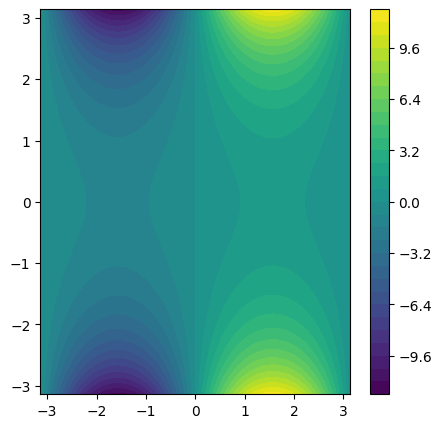

In [ ]:
fig = plt.figure(figsize=(5,5))
cs = plt.contourf(xx, yy, zz.real, 30)
cbar = fig.colorbar(cs)
plt.show()

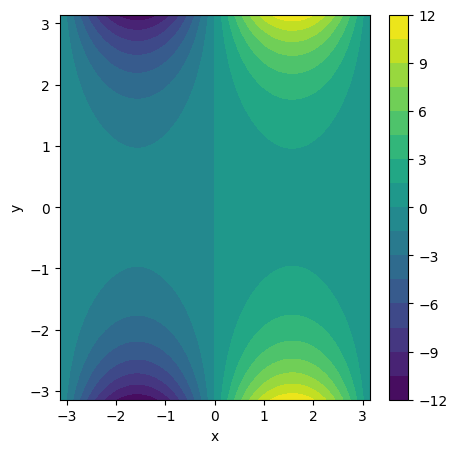

In [18]:
fig = plt.figure(figsize=(5,5))
cs = plt.contourf(xx, yy, zz.real, 15)
cbar = fig.colorbar(cs)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 2. uzdevums. Lineāru vienādojumu sistēma

Rekursīvi vienādojumi ar mainīgajiem $x_0, x_1,\dots,x_N$ satur arī informāciju, kā noteikt jebkura mainīgā vērtību, ja zināmi tā kaimiņi. Lai varētu noteikt jebkuru virknes locekli, nepieciešama arī viens vai vairāki *pamata gadījumi*.

Piemēram, Fibonači virknē $F=(1,1,2,3,5,8,\dots)$ katrs virknes loceklis ir divu iepriekšējo summa, t.\i., $F_n=F_{n-1}+F_{n-2}$. Ja nodrošinām divus pamata gadījumus (number of different terms in the relation minus 1) $F_0=1$ un $F_1=1$, tad varam aprēķināt jebkuru virknes locekli, piemēram, $F_2=F_1+F_0=2$, $F_3=F_2+F_1=3$ utt. Tomēr tik vienkārš risinājums ne vienmēr nostrādā.

Aplūkosim šādu rekursīvas saistības gadījumu 
$$\frac{x_{n-1}-2x_{n}+x_{n+1}}{\delta^2}+\omega^2x_n=0 ,$$
kur $\omega$ un $\delta$ ir pozitīvas konstantes. Saistība satur trīs dažādus locekļus ($x_{n-1}$, $x_n$ un $x_{n+1}$), tātad nepieciešami divi pamata gadījumi. Pieņemsim, ka $x_0=0.1$ un $x_{785}=0$. Šāda veida saistības bieži tiek izmantotas, lai risinātu diferenciālvienādojumus (nākotnē sastapsiet matemātikas kursos).

Lai atrastu visus virknes locekļus $x_n$, iepriekšējo vienādojumu varam pārrakstīt šekojoši 
$$x_{n-1}+(\omega^2\delta^2-2)x_n+x_{n+1}=0$$
un izveidot vienādojumu sistēmu katram $1\leqslant n\leqslant 784$. Šāda sistēma saturēs 784 vienādojumus un 784 nezināmos (no $x_1$ līdz $x_{784}$), kas var tikt viegli atrisināta.

1. Izveido mainīgos `delta = 0.01` un `omega = 1` katrai $\delta$ un $\omega$ attiecīgi. Izveido sistēmas matricu un sistēmas labās puses vektoru.

2. Atrisini sistēmu, lai atrastu vektoru un nezināmos $\begin{bmatrix}x_1&\dots&x_{784}\end{bmatrix}^\top$. Neaizmirsti, ka $x_0$ un $x_{785}$ ir konstantes, nevis nezināmie, tapēc tiem atbilstošos vienādojumos jānovieto labajā izteiksmes pusē.

3. Grafiski attēlo iegūto atrisinājumu $x_n(n)$ , kur $n\in[0,785]$.

In [ ]:
#vieta kodam

4. Izmantojot grafiku, noskaidro funkcijas $x(t)$ analītisko formu, kad $t=n\delta$.

… Funkcija ir kosinus, laika momentā $t=0$ tā sasniedz maksimumu un tad sāk dilt.

… Funkcijas periods ir $2\pi$, tādēļ frekvence $\omega=1$.

… Amplitūda ir 0.1, tādēļ gala vienādojums ir $x(t)=0.1\cos t$.

In [ ]:
#vieta kodam

5. Izmaini parametru $\omega$ uz 1.4, 1.8, 2.2. Pārrēķini un attēlo jaunos risinājumus.

… Grafiki atšķiras tikai ar frekvencēm. Tieši salīdzinot var redzēt, ka $\omega$ ir leņķiskā frekvence.

In [ ]:
#vieta kodam

## 3. uzdevums. 3D grafiki

Izveido 3D grafiku, kas attēlo funkciju $z=\sin(\sqrt{x^2+y^2})$.

1. Importē nepieciešamās bibliotēkas: `numpy` (matemātiskajiem aprēķiniem), `matplotlib.pyplot` un `mpl_toolkits.mplot3d` (grafiku veidošanai).
2. Izveido matemātisko funkciju $z = f(x, y)$.
3. Izveido datu režģi, izmantojot `numpy.meshgrid`.
4. Uzzīmē 3D grafiku, izmantojot `ax.plot_surface` vai `ax.contour3D`.
5. Pievieno nosaukumu un asu nosaukumus.
6. Pievieno anotācijas vai maini krāsu paleti.

## 4. uzdevums. Testā nododamais uzdevums

Izveido 3D grafiku funkcijai $z=\cos(x)\cdot\sin(y)$. Saglabā vektorgrafikā, norādot platumu 16pc (augstumu pielāgo platumam).